<center><u><H1>Iris dataset (various models)</H1></u></center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
%matplotlib inline

In [2]:
iris_data = load_iris()
df_iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df_iris['target'] = pd.Series(iris_data.target)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Preprocessing

In [3]:
X = df_iris.iloc[:, 0:4]
y = df_iris['target']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

In [5]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Creating models

In [6]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [7]:
gnb = GaussianNB()
gnb.fit(X_train_std, y_train)

GaussianNB()

# Predictions (DT - one sample value)

In [8]:
dt.predict(X.iloc[80:81, :])

array([1])

In [9]:
dt.predict_proba(X.iloc[80:81, :])

array([[0., 1., 0.]])

# Predictions

In [10]:
dt_pred = dt.predict(X_test)
gnb_pred = gnb.predict(X_test_std)

# DT - report

In [11]:
print("DecisionTree CV Score:\n", cross_val_score(dt, X_test, y_test, cv=10).mean())

DecisionTree CV Score:
 0.975


In [12]:
print("DecisionTree Accuracy:\n", accuracy_score(y_test, dt_pred))

DecisionTree Accuracy:
 0.9777777777777777


In [13]:
print("DecisionTree Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))

DecisionTree Confusion Matrix:
 [[17  0  0]
 [ 0 16  0]
 [ 0  1 11]]


In [14]:
print("DecisionTree Classification Report:\n", classification_report(y_test, dt_pred))

DecisionTree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.94      1.00      0.97        16
           2       1.00      0.92      0.96        12

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



# GNB - report

In [15]:
print("GNB CV Score:\n", cross_val_score(gnb, X_test_std, y_test, cv=10).mean())

GNB CV Score:
 0.9800000000000001


In [16]:
print("GNB Accuracy:\n", accuracy_score(y_test, gnb_pred))

GNB Accuracy:
 0.9555555555555556


In [17]:
print("GNB Confusion Matrix:\n", confusion_matrix(y_test, gnb_pred))

GNB Confusion Matrix:
 [[17  0  0]
 [ 0 16  0]
 [ 0  2 10]]


In [18]:
print("GNB Classification Report:\n", classification_report(y_test, gnb_pred))

GNB Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.89      1.00      0.94        16
           2       1.00      0.83      0.91        12

    accuracy                           0.96        45
   macro avg       0.96      0.94      0.95        45
weighted avg       0.96      0.96      0.95        45



# Plotting models

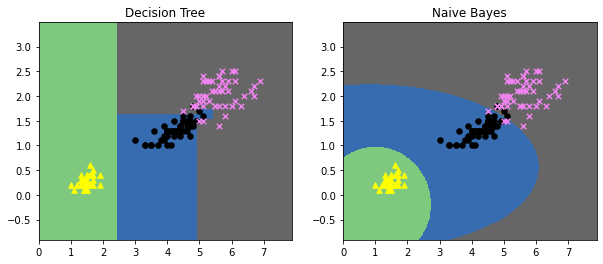

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
res = 0.02
X2 = X.to_numpy()[:,[2,3]]

x1min, x1max = X2[:,0].min() - 1, X2[:,0].max() + 1
x2min, x2max = X2[:,1].min() - 1, X2[:,1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, res), np.arange(x2min, x2max, res))

for clf, ax, title in zip([dt, gnb], axs, ['Decision Tree', 'Naive Bayes']):
    clf.fit(X2, y)
    output = clf.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    output = output.reshape(xx1.shape)
    ax.pcolormesh(xx1, xx2, output, cmap=plt.cm.Accent, shading='auto')
    ax.scatter(X2[y==0, 0], X2[y==0, 1], s=30, color='yellow', marker='^')
    ax.scatter(X2[y==1, 0], X2[y==1, 1], s=30, color='black', marker='o')
    ax.scatter(X2[y==2, 0], X2[y==2, 1], s=30, color='violet', marker='x')
    ax.set_title(title)